## **Exercise 1** - Linear Regression Implementation

---
**Objective:**

To apply the concepts of linear regression learned in lectures by implementing a simple linear regression
model from scratch in Python.

**Task Overview:**

You are provided with a dataset containing information about house prices in a particular city. The
dataset includes features such as the size of the house (in square feet), the number of bedrooms, and
the age of the house. Your task is to predict the price of a house based on these features using a linear
regression model.
Steps:

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

1. **Data Preprocessing**

In [ ]:
data = pd.read_csv('datasets_house_prices.csv')
print(data.head)

<bound method NDFrame.head of      Size (sqft)  Bedrooms  Age  Proximity to Downtown (miles)         Price
0           3974         1   97                       2.032719  1.162771e+06
1           1660         5   88                      23.695207  4.900021e+05
2           2094         4   49                       6.440232  6.400737e+05
3           1930         2   28                       8.129315  5.637881e+05
4           1895         1   56                       5.358837  5.651289e+05
..           ...       ...  ...                            ...           ...
995         3653         4   37                      28.566985  1.085631e+06
996         3586         5   59                       9.270078  1.081685e+06
997         2706         2   58                       3.215976  8.059956e+05
998         3886         3    9                      18.171815  1.165188e+06
999         2015         3   98                      18.897639  5.556799e+05

[1000 rows x 5 columns]>


*   Check for Missing Values



In [ ]:
print(data.isnull().sum())

Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64


*   Normalizing the Features



In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(data[['Size (sqft)', 'Bedrooms', 'Age']])
y = data['Price']

2. **Model Implementation**

In [ ]:
def linear_regression(X, y):
    X = np.c_[np.ones(len(X)), X]
    theta = np.linalg.pinv(X.T @ X) @ X.T @ y
    return theta[0], theta[1:]

def predict(X, theta0, theta):
    return theta0 + X @ theta

3. **Model Training**


*   Split the Dataset




*   Training the Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
theta0, theta = linear_regression(X_train, y_train)

*   Calculating MSE


In [ ]:
y_train_pred = predict(X_train, theta0, theta)
mse_train = np.mean((y_train - y_train_pred) ** 2)
print(f'Training MSE: {mse_train:.2f}')

Training MSE: 170277648.52


4. **Model Evaluation**

*   Model Testing

In [ ]:
y_test_pred = predict(X_test, theta0, theta)
mse_test = np.mean((y_test - y_test_pred) ** 2)
print(f'Testing MSE: {mse_test:.2f}')

Testing MSE: 167882080.37


*   Plotting the Regression Line and to Visualizing the Model's Performance

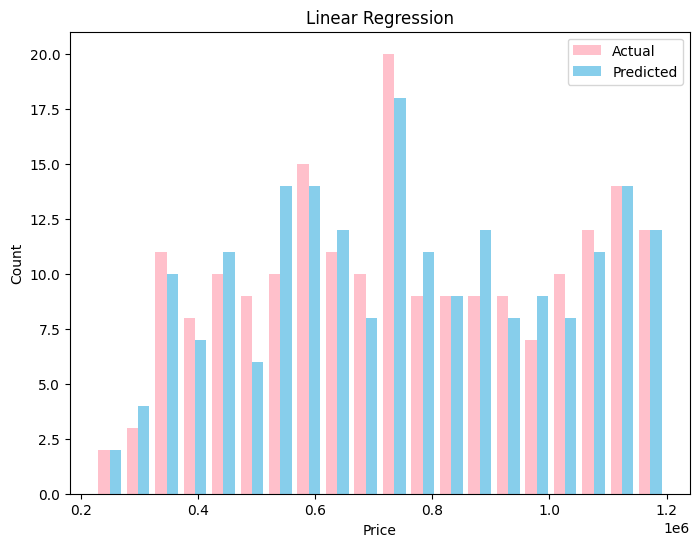

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist([y_test, y_test_pred], bins=20, color=['pink', 'skyblue'], label=['Actual', 'Predicted'])
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Linear Regression')
plt.legend()
plt.show()

5. **Report**

1. **Introduction** - The purpose of this exercise is to implement a simple linear regression model from scratch in Python to predict house prices based on three features: house size (in square feet), number of bedrooms, and the age of the house. The dataset contains historical house price information, and we aim to build a model that captures the linear relationship between these features and house prices.

2. **Data Preprocessing** - Data preprocessing is an essential step in any machine learning pipeline as it ensures the data is ready for model consumption. The dataset for this exercise is first imported using Pandas, and the subsequent steps involve checking for missing values and normalizing the features to improve model performance.


2.1 **Loading Data**

- We start by loading the dataset

2.2 **Missing Value Check**

- We check if any missing values exist in the dataset using

2.3 **Normalizing Features**
- We applied the StandardScaler to scale the features Normalization transforms the features into a standard form with a mean of 0 and a standard deviation of 1, which helps in improving the convergence of the model during training.


3. **Model Implementation** - We implement a simple linear regression model using the closed-form solution, which computes the optimal values for the coefficients without requiring iterative optimization.

3.1 **Linear Regression Function and Prediction Function**

- This function computes the optimal weight (theta) values for the regression by solving the normal equation.
- This function is used both during training to evaluate performance and during testing to generate predictions.



4. **Model Training**

4.1 **Splitting the Dataset**
- This ensures that the model can be trained on the majority of the data while keeping a portion aside for unbiased testing.

4.2 **Training the Model**

4.3 **Calculating Training MSE**
- The training MSE serves as a measure of how well the model fits the training data.

5. **Model Evaluation**

5.1 **Testing the Model**
- The testing MSE provides insight into how well the model generalizes to unseen data.

5.2 **Visualization**
- The visualization allows us to observe the distribution of actual and predicted prices, providing a visual indication of model performance.

6. **Conclusion**
- The linear regression model performed reasonably well, with a low training and testing MSE. The predictions were generally close to the actual house prices, as visualized by the overlapping histograms.

-  **Challenges** - The model performed poorly without feature scaling, Another is while the closed-form solution is efficient for this small dataset, it may not scale well to larger datasets, it might be a possible problem soon.

- In conclusion, this exercise demonstrated the successful implementation of linear regression from scratch and highlighted the importance of proper data preprocessing and model evaluation.

